In [1]:
import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# prepare for a device agnoustic code

device = "cuda" if torch.cuda.is_available() else "cpu"

## Prepare the Data

Here are are just preparing the toy data for our machine learning model

In [3]:
# import the dataset
X, y = make_circles(500, random_state=42, noise=0.03)

X.shape

(500, 2)

Visualize the data set

In [10]:
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "y": y
})

x_zeros = df[df['y'] == 0]
x_ones = df[df['y'] == 1]

x_zeros.shape, x_ones.shape

((250, 3), (250, 3))

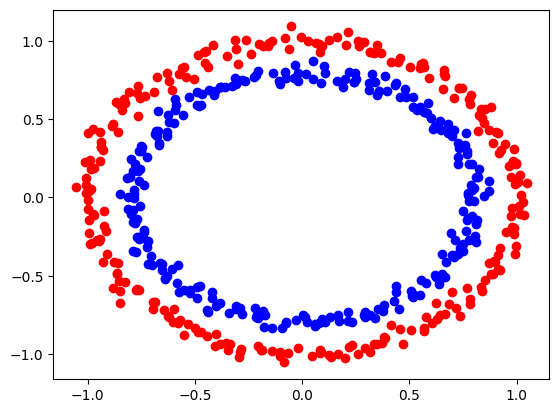

In [5]:
plt.scatter(x_ones['X1'], x_ones['X2'], c='b')
plt.scatter(x_zeros['X1'], x_zeros['X2'], c='r')

## Build The model
Below are we building the pytorch model that should predict the dot in which circle

### Define the model
define the model architecture

In [6]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(2, 10)
        self.linear_2 = nn.Linear(10, 10)
        self.linear_3 = nn.Linear(10, 1)

    def forward(self, x):
        z = self.linear_1(x)
        z = torch.tanh(z)
        z = self.linear_2(z)
        z = torch.tanh(z)
        z = self.linear_3(z)
        return z

### Prepare the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

X_train.shape

torch.Size([375, 2])

In [8]:
def calculate_accuracy(y_true, y_preds):
    correct = (y_true == y_preds).sum()
    accuracy = correct / y_true.shape[0]
    return (torch.round(accuracy * 100)).item()

### Train The Model
Here we are going to build a training and testing loop

In [9]:
model_0 = CircleModel().to(device)

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss()

epochs = 25000

for epoch in range(epochs):

    # #
    # Training Loop
    # #
    model_0.train()
    y_logits = model_0(X_train).squeeze()

    loss = loss_fn(y_logits, y_train)
    accuracy = calculate_accuracy(y_train, torch.round(torch.sigmoid(y_logits)))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # #
    # Testing Loop
    # #
    model_0.eval()

    with torch.inference_mode():
        y_test_logits = model_0(X_test).squeeze()

    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = calculate_accuracy(y_test, torch.round(torch.sigmoid(y_test_logits)))

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, loss: {loss}, accuracy: {accuracy}%, test_loss: {test_loss}, test_accuracy: {test_accuracy}%")





epoch: 0, loss: 0.6940507888793945, accuracy: 49.0%, test_loss: 0.6890052556991577, test_accuracy: 55.0%
epoch: 1000, loss: 0.6919437050819397, accuracy: 51.0%, test_loss: 0.6943598389625549, test_accuracy: 46.0%
epoch: 2000, loss: 0.6910020112991333, accuracy: 48.0%, test_loss: 0.6960985660552979, test_accuracy: 38.0%
epoch: 3000, loss: 0.6901594996452332, accuracy: 52.0%, test_loss: 0.6969136595726013, test_accuracy: 45.0%
epoch: 4000, loss: 0.6892250180244446, accuracy: 52.0%, test_loss: 0.6971794366836548, test_accuracy: 46.0%
epoch: 5000, loss: 0.6880965828895569, accuracy: 54.0%, test_loss: 0.6970090270042419, test_accuracy: 44.0%
epoch: 6000, loss: 0.6866642236709595, accuracy: 54.0%, test_loss: 0.6963677406311035, test_accuracy: 47.0%
epoch: 7000, loss: 0.6847761869430542, accuracy: 55.0%, test_loss: 0.6951131820678711, test_accuracy: 46.0%
epoch: 8000, loss: 0.6822078227996826, accuracy: 56.0%, test_loss: 0.6930030584335327, test_accuracy: 48.0%
epoch: 9000, loss: 0.6786213517